In [1]:
# Import the necessary libraries and load the files needed for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches


## Quality Star Rating Analysis

### Quality Star Rating Measures (7)
* How often the home health team began their patients care in a timely manner
* How often patients got better at walking or moving around
* How often patients got better at getting in and out of bed
* How often patients got better at bathing
* How often patients breathing improved
* How often patients got better at taking their drugs correctly by mouth
* How often home health patients had to be admitted to the hospital


In [2]:
df = pd.read_csv('Resources/HH_Provider_Jan2023.csv')


In [3]:
# Set the below parameters so that all rows and columns would be visible

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Calculate the number of rows and columns in the dataset

df.shape


(11609, 64)

In [5]:
df.head()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9.075630e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.5,NaN,91.2,NaN,99.7,NaN,44.3,NaN,89.0,NaN,90.8,NaN,89.9,NaN,96.5,NaN,95.4,NaN,14.9,NaN,14.2,NaN,0.4,NaN,90.0,NaN,1.7,NaN,99.3,NaN,253.0,302.0,83.77,89.37,84.85,93.37,Better Than National Rate,NaN,5.0,3

In [6]:
df.tail()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3.078836e+09,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.0,NaN,96.5,NaN,99.1,NaN,60.3,NaN,67.4,NaN,52.6,NaN,67.7,NaN,45.2,NaN,65.4,NaN,10.8,NaN,12.3,NaN,0.0,NaN,93.9,NaN,2.6,NaN,100.0,NaN,61.0,77.0,79.22,74.69,66.10,81.07,Same As National Rate,NaN,3.0,125.0,2.40,3.55,2.48,5.22,Same As National Rate,N

### Remove cells that will not be related to further analysis


In [7]:
columns_to_drop = ['Footnote for quality of patient care star rating',
                  'Footnote for how often the home health team began their patients care in a timely manner',
                  'Footnote for how often the home health team taught patients (or their family caregivers) about their drugs',
                  'Footnote for how often the home health team determined whether patients received a flu shot for the current flu season',
                  'Footnote for how often patients got better at walking or moving around',
                  'Footnote for how often patients got better at getting in and out of bed',
                  'Footnote for how often patients got better at bathing',
                  'Footnote for how often patients breathing improved',
                  'Footnote for how often patients got better at taking their drugs correctly by mouth',
                  'Footnote for how often home health patients had to be admitted to the hospital',
                  'Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted',
                  'Footnote Changes in skin integrity post-acute care: pressure ulcer/injury',
                  'Footnote for how often physician-recommended actions to address medication issues were completely timely',
                  'Footnote for Percent of Residents Experiencing One or More Falls with Major Injury',
                  'Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function',
                  'Footnote for DTC Risk-Standardized Rate',
                  'Footnote for PPR Risk-Standardized Rate',
                  'Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']

df.drop(columns = columns_to_drop, inplace = True)

In [8]:
df.shape


(11609, 46)

In [9]:
df.head()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9.075630e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.5,91.2,99.7,44.3,89.0,90.8,89.9,96.5,95.4,14.9,14.2,0.4,90.0,1.7,99.3,253.0,302.0,83.77,89.37,84.85,93.37,Better Than National Rate,5.0,337.0,1.48,2.92,2.14,4.01,Same As National Rate,0.89,500.0
1,AK,27002,HOSPICE & HOME CARE OF JUNEAU,1803 GLACIER HIGHWAY,JUNEAU,99801,9.074633e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,12/27/1982,2.0,94.4,81.8,60.2,55.3,67.5,57.9,50.6,62.5,10.0,16.1,1.4,96.0,2.4,100.0,60.0,86.0,69.77,73.14,62.75,81.72,Same As National Rate,2.0,76.0,2.63,3.37,2.31,4.82,Same As National Rate,0.85,220.0
2,AK,27006,FAIRBANKS MEMORIAL HOSPITAL HHA,1701 GILLAM WAY,FAIRBANKS,99701,9.074585e+09,VOLUNTARY NON-PROFIT - OTHER,Yes,Yes,No,No,Yes,Yes,9/19/1985,2.0,71.9,98.4,53.8,68.7,70.1,64.4,72.4,58.7,16.4,25.2,1.5,96.1,2.8,98.0,110.0,129.0,85.27,87.59,79.40,92.77,Better Than National Rate,1.0,153.0,0.65,3.02,2.12,4.43,Same As National Rate,0.74,224.0
3,AK,27008,ANCORA HOME HEALTH & HOSPICE,2851 E PALMER-WASILLA HWY,WASILLA,99654,9.073525e+09,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,1/22/1987,4.0,97.9,99.8,55.7,84.7,87.4,89.2,86.2,88.8,11.9,12.6,0.2,99.7,1.8,100.0,403.0,518.0,77.80,86.77,83.13,90.28,Better Than National Rate,15.0,459.0,3.27,3.18,2.28,4.34,Same As National Rate,0.97,852.0
4,AK,27009,PETERSBURG MEDICAL CENTER HOME,P.O. BOX 589,PETERSBURG,99833,9.077724e+09,GOVERNMENT - STATE/COUNTY,Yes,Yes,Yes,Yes,No,No,7/21/1987,2.0,89.9,95.9,38.1,67.5,79.4,70.8,72.1,59.8,20.9,13.4,0.0,91.1,6.3,100.0,16.0,37.0,43.24,49.52,34.23,63.21,Worse Than National Rate,NaN,6.0,NaN,NaN,NaN,NaN,Not Available,1.09,85.0


In [10]:
df.tail()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3.078836e+09,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.0,96.5,99.1,60.3,67.4,52.6,67.7,45.2,65.4,10.8,12.3,0.0,93.9,2.6,100.0,61.0,77.0,79.22,74.69,66.10,81.07,Same As National Rate,3.0,125.0,2.40,3.55,2.48,5.22,Same As National Rate,1.13,159.0
11605,WY,537831,BEST HOME HEALTH & HOSPICE LLC,105 YELLOW CREEK ROAD,EVANSTON,82930,3.077893e+09,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,12/16/2004,2.5,99.2,97.5,55.5,75.4,77.8,70.6,60.0,54.1,11.6,14.2,0.0,94.4,4.2,99.7,102.0,182.0,56.04,58.57,50.89,66.03,Worse Than National Rate,1.0,165.0,0.61,3.01,2.01,4.16,Same As National Rate,0.90,516.0
11606,WY,537833,PREMIUM HEALTH AT HOME INC,1262 N 22ND ST,LARAMIE,82072,3.077459e+09,PROPRIETARY,Yes,Yes,No,No,No,Yes,7/14/2009,NaN,33.3,83.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.3,0.0,83.3,14.0,20.0,70.00,75.66,56.73,89.40,Same As National Rate,0.0,20.0,0.00,3.32,2.35,4.73,Same As National Rate,0.87,33.0
11607,WY,537834,PREMIUM HEALTH AT HOME RAWLINS LLC,1904 EDINBURGH ST,RAWLINS,82301,3.073249e+09,PROPRIETARY,Yes,Yes,No,No,No,No,9/13/2011,NaN,50.0,87.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.0,3.6,100.0,NaN,13.0,NaN,NaN,NaN,NaN,Not Available,NaN,16.0,NaN,NaN,NaN,NaN,Not Available,1.37,28.0
11608,WY,537835,ECLIPSE HOME HEALTH,"304 COFFEEN AVENUE, SUITE B",SHERIDAN,82801,NaN,-,-,-,-,-,-,-,12/9/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 46 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   State                                                                                                                                                     11609 non-null  object 
 1   CMS Certification Number (CCN)                                                                                                                            11609 non-null  int64  
 2   Provider Name                                                                                                                                             

In [12]:
df.describe()


,CMS Certification Number (CCN),ZIP,Phone,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
count,11609.000000,11609.000000,1.094800e+04,7786.000000,8419.000000,8399.000000,8075.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000,6861.000000,7915.000000,8423.000000,8407.000000,8423.000000,7248.000000,9249.000000,7248.000000,7248.000000,7248.000000,7248.000000,6290.000000,8983.000000,6290.000000,6290.000000,6290.000000,6290.000000,8393.000000,9414.000000
mean,342764.924800,60242.427599,6.144806e+09,3.249743,94.127771,96.900691,71.859356,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817,11.383763,0.401693,91.848831,1.028845,97.691511,237.881898,244.428695,71.779083,76.794280,68.510509,83.876076,13.742448,285.587443,3.680211,3.421261,2.470162,4.721854,0.972535,485.166348
std,225151.461639,26919.107532,2.452492e+09,1.022742,8.995277,7.584678,18.511704,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187,4.293047,0.764933,15.069560,1.211546,7.821118,462.119037,522.238890,16.053716,14.569428,16.930562,12.095530,30.081077,730.595302,2.595420,0.335000,0.305674,0.483990,0.138200,865.438835
min,17000.000000,612.000000,1.956281e+09,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.680000,2.510000,5.410000,0.000000,1.000000,0.000000,2.320000,1.690000,3.010000,0.320000,1.000000
25%,147214.000000,36608.000000,3.863275e+09,2.500000,92.700000,97.200000,63.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000,8.700000,0.000000,92.300000,0.000000,98.600000,40.000000,25.000000,65.710000,71.287500,60.737500,79.380000,2.000000,14.000000,2.210000,3.230000,2.280000,4.440000,0.890000,72.000000
50%,347071.000000,67202.000000,6.269157e+09,3.500000,97.800000,99.200000,74.600000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000,11.300000,0.100000,97.200000,0.800000,99.800000,101.000000,88.000000,75.835000,81.110000,73.460000,87.050000,5.000000,71.000000,3.290000,3.390000,2.400000,4.750000,0.980000,226.000000
75%,537063.000000,83263.000000,8.185884e+09,4.000000,99.600000,99.900000,84.200000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000,13.900000,0.500000,99.100000,1.400000,100.000000,255.000000,254.000000,82.212500,86.560000,80.740000,91.67

#### 11609 Medicare certified agencies
#### 7786 Medicare certified agencies with Quality Star Ratings


In [13]:
# Percentage of Medicare certified agencies with star ratings

percent_agencies_with_star_ratings = 7786/11609
print("Percentage of Medicare certified agencies with star ratings is {:.2f}%.".format(percent_agencies_with_star_ratings))


Percentage of Medicare certified agencies with star ratings is 0.67%.


In [14]:
df.dtypes


State                                                                                                                                                        object
CMS Certification Number (CCN)                                                                                                                                int64
Provider Name                                                                                                                                                object
Address                                                                                                                                                      object
City                                                                                                                                                         object
ZIP                                                                                                                                                           int64
Phone           

In [15]:
# Check if there are any missing values

df.isnull().sum()


State                                                                                                                                                          0
CMS Certification Number (CCN)                                                                                                                                 0
Provider Name                                                                                                                                                  0
Address                                                                                                                                                        0
City                                                                                                                                                           0
ZIP                                                                                                                                                            0
Phone                             

###  Create Star Rating DataFrame to look at the correlation of star rating measures to the overall star rating

In [16]:
# Create the star_rating_df DataFrame.
star_rating_df = df[['Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_df.head()

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
0,4.5,91.2,89.0,90.8,89.9,96.5,95.4,14.9
1,2.0,94.4,55.3,67.5,57.9,50.6,62.5,10.0
2,2.0,71.9,68.7,70.1,64.4,72.4,58.7,16.4
3,4.0,97.9,84.7,87.4,89.2,86.2,88.8,11.9
4,2.0,89.9,67.5,79.4,70.8,72.1,59.8,20.9


In [17]:
star_rating_corr = star_rating_df.corr()
star_rating_corr

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
Quality of patient care star rating,1.000000,0.433344,0.821845,0.756807,0.821046,0.751005,0.810462,-0.187728
How often the home health team began their patients care in a timely manner,0.433344,1.000000,0.302806,0.250379,0.307788,0.255505,0.293271,-0.002059
How often patients got better at walking or moving around,0.821845,0.302806,1.000000,0.808585,0.862053,0.729698,0.753123,-0.018372
How often patients got better at getting in and out of bed,0.756807,0.250379,0.808585,1.000000,0.784608,0.707212,0.701502,0.016229
How often patients got better at bathing,0.821046,0.307788,0.862053,0.784608,1.000000,0.761498,0.764294,-0.031767
How often patients breathing improved,0.751005,0.255505,0.729698,0.707212,0.761498,1.000000,0.681671,-0.004590
How often patients got better at taking their drugs correctly by mouth,0.810462,0.293271,0.753123,0.701502,0.764294,0.681671,1.000000,-0.005155
How often home health patients had to be admitted to the hospital,-0.187728,-0.002059,-0.018372,0.016229,-0.031767,-0.004590,-0.005155,1.000000


Text(0.5, 1.0, 'Correlation of Star Rating Measures')

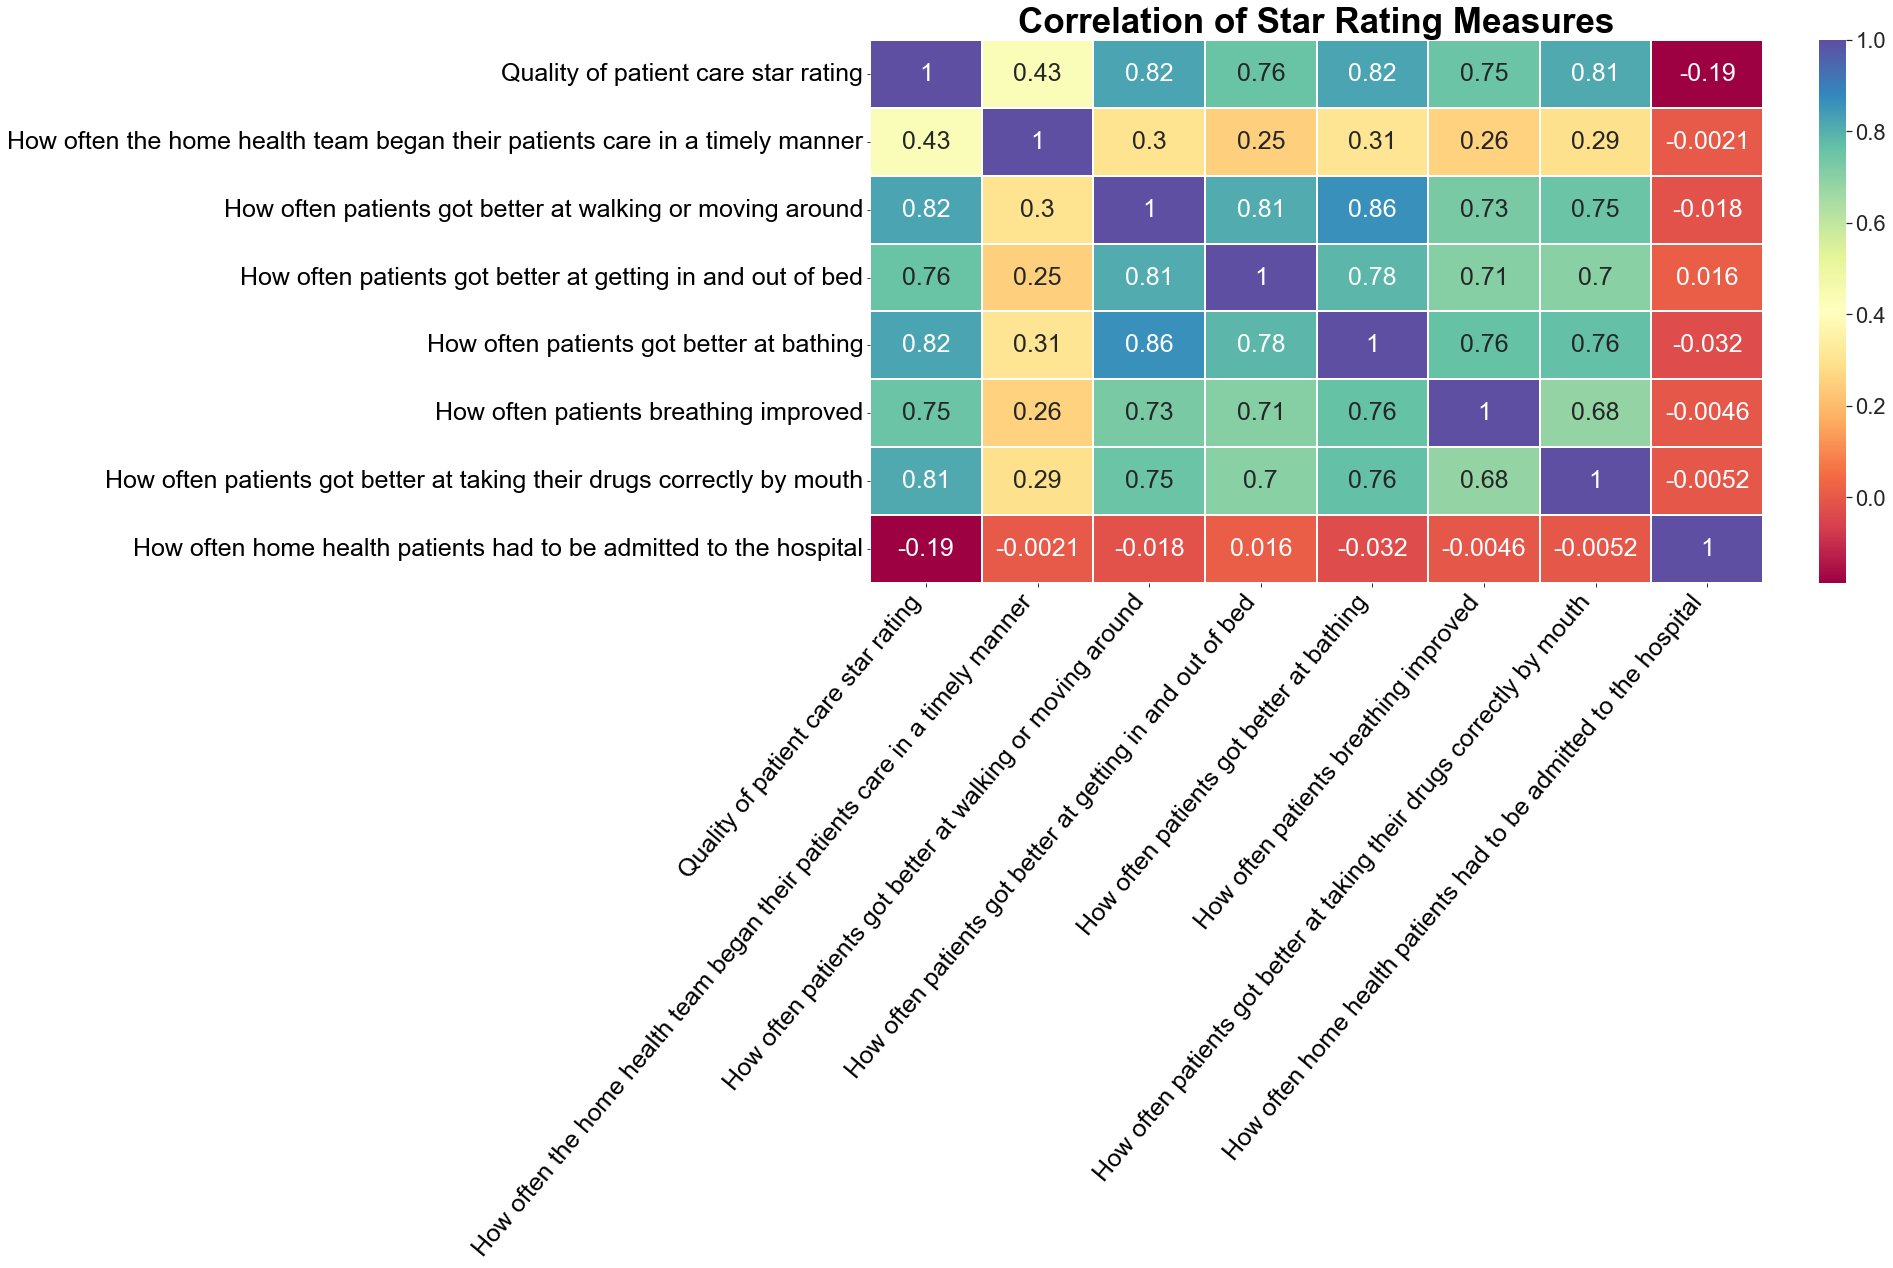

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

# Sample figsize in inches

sns.set(font_scale = 2.0)

g = sns.heatmap(star_rating_corr, xticklabels = star_rating_corr.columns, yticklabels = star_rating_corr.columns, 
            annot = True, linewidths = .2, ax = ax, cmap = 'Spectral', annot_kws={'size': 25})
g.set_xticklabels(g.get_xticklabels(), rotation = 50, fontsize = 25, ha = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25, va = "center")
plt.title('Correlation of Star Rating Measures', fontsize = 35, fontweight = 'bold')

In [19]:
star_rating_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,7786.000000,8419.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000
mean,3.249743,94.127771,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817
std,1.022742,8.995277,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,92.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000
50%,3.500000,97.800000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000
75%,4.000000,99.600000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,38.800000


### Quality Star Rating Distribution


In [20]:
star_rating = pd.DataFrame(df['Quality of patient care star rating'].value_counts())
star_rating


,Quality of patient care star rating
3.5,1298
3.0,1239
4.0,1205
2.5,1042
4.5,1024
2.0,802
1.5,555
5.0,488
1.0,133


Text(0.5, 1.0, 'Quality Star Rating Distribution')

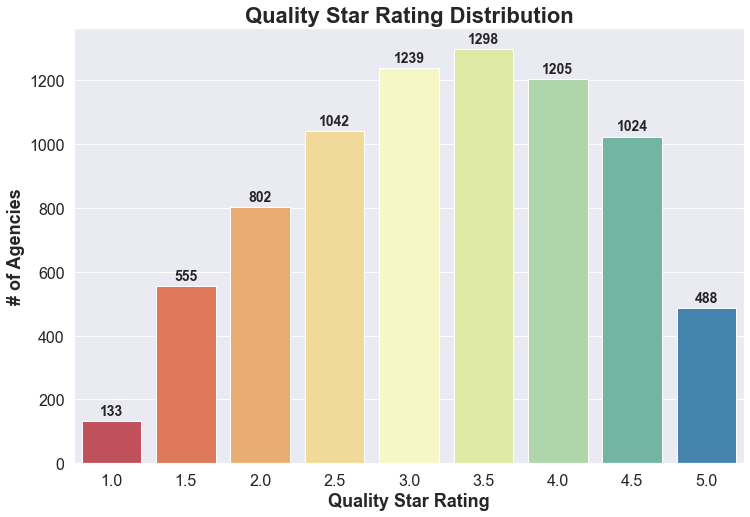

In [21]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [22]:
# Create star_rating_state_df DataFrame.
star_rating_state_df = df[['State',
                    'Quality of patient care star rating']].copy()
star_rating_state_df.head()


,State,Quality of patient care star rating
0,AK,4.5
1,AK,2.0
2,AK,2.0
3,AK,4.0
4,AK,2.0


In [23]:
star_rating_state_df.describe()


,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


In [24]:
star_rating_state_clean_df = star_rating_state_df.dropna()
star_rating_state_clean_df.describe()

,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


In [25]:
# Create a State summary by using .groupby

star_rating_state_clean_df.groupby(['State']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index()


State Quality of patient care star rating                           
                                       count      mean median  min  max
0     AK                                  14  2.642857   2.25  1.5  4.5
1     AL                                 114  3.964912   4.00  1.5  5.0
2     AR                                  93  3.596774   4.00  1.5  5.0
3     AZ                                 129  3.360465   3.50  1.5  5.0
4     CA                                1353  3.214708   3.00  1.0  5.0
5     CO                                 117  3.213675   3.50  1.0  5.0
6     CT                                  69  2.971014   3.00  1.0  5.0
7     DC                                   9  3.444444   3.50  2.5  5.0
8     DE                                  13  3.576923   3.50  2.5  4.5
9     FL                                 729  3.623457   4.00  1.0  5.0
10    GA                                 100  3.600000   3.50  2.0  5.0
11    GU                                   3  2.333333   2.50  2.0  2.5
12    HI                                  13  3.115385   3.00  1.5  5.0
13    IA                                 100  2.940000   3.00  1.5  5.0
14    ID                                  47  3.553191   3.50  1.5  5.0
15    IL                                 444  3.003378   3.00  1.0  5.0
16    IN                                 144  3.267361   3.00  1.0  5.0
17    KS                                  91  3.181319   3.50  1.5  5.0
18    KY                                  87  3.747126   4.00  1.5  5.0
19    LA                                 170  3.700000   4.00  1.5  5.0
20    MA                                 133  2.913534   3.00  1.0  5.0
21    MD                                  50  3.800000   4.00  2.0  5.0
22    ME                                  20  3.275000   3.25  2.0  4.5
23    MI                                 337  3.215134   3.50  1.0  5.0
24    MN                                 102  2.740196   2.50  1.0  4.5
25    MO                                 123  3.211382   3.00  1.0  5.0
26    MP                                   2  2.500000   2.50  1.5  3.5
27    MS                                  43  3.895349   4.00  2.0  5.0
28    MT                                  22  2.909091   3.00  1.5  4.5
29    NC                                 157  3.449045   3.50  1.5  5.0
30    ND                                  14  3.178571   3.00  2.0  4.0
31    NE                                  52  3.153846   3.00  1.5  5.0
32    NH                                  23  2.978261   3.00  1.5  4.0
33    NJ                                  40  3.612500   3.50  2.5  4.5
34    NM                                  64  3.132812   3.00  1.5  5.0
35    NV                                 129  2.813953   2.50  1.0  5.0
36    NY                                 102  3.303922   3.50  1.5  5.0
37    OH                                 270  3.188889   3.25  1.0  5.0
38    OK                                 196  3.091837   3.00  1.5  5.0
39    OR                                  48  3.072917   3.00  1.5  5.0
40    PA                                 219  3.273973   3.50  1.0  5.0
41    PR                                  36  3.638889   3.50  2.5  5.0
42    RI                                  19  3.447368   3.50  2.5  5.0
43    SC                                  70  3.771429   4.00  1.5  5.0
44    SD                                  21  3.309524   3.50  1.5  5.0
45    TN                                 113  3.809735   4.00  1.0  5.0
46    TX                                1044  2.877395   3.00  1.0  5.0
47    UT                                  78  3.493590   3.50  2.0  5.0
48    VA                                 192  3.299479   3.50  1.0  5.0
49    VI                                   2  3.750000   3.75  2.5  5.0
50    VT                                  10  2.800000   2.50  2.0  4.0
51    WA                                  64  3.796875   4.00  2.0  5.0
52    WI                                  79  2.993671   3.00  1.0  5.0
53    WV                                  5

Text(0.5, 1.0, 'Quality of Patient Care Star Rating by State/Territory')

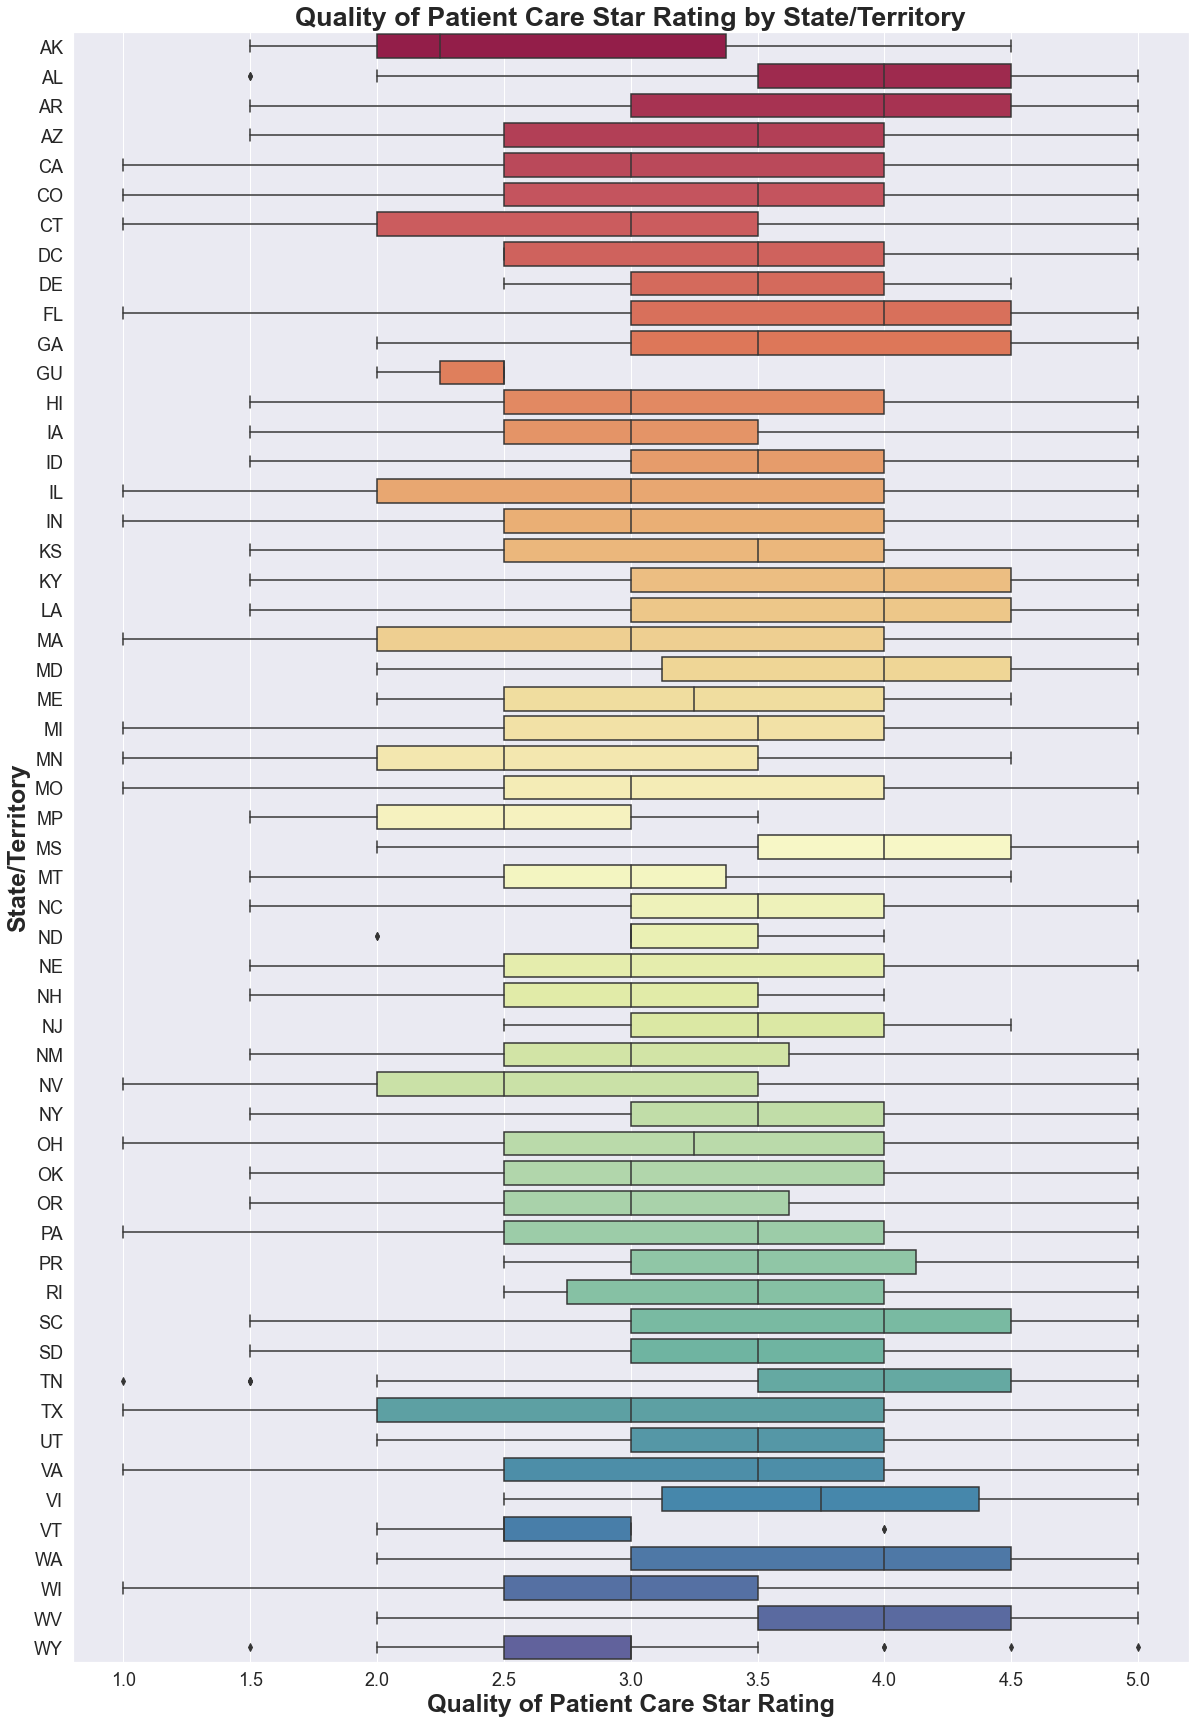

In [26]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=star_rating_state_clean_df, x='Quality of patient care star rating', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating by State/Territory', size = 27, fontweight = 'bold')


### Quality Star Rating Based on Type of Ownership
* GOVERNMENT - COMBINATION GOVT & VOLUNTARY
* GOVERNMENT - LOCAL
* GOVERNMENT - STATE/COUNTY
* PROPRIETARY
* VOLUNTARY NON-PROFIT - OTHER
* VOLUNTARY NON-PROFIT - PRIVATE
* VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION


In [27]:
# Create the star_rating_too_df DataFrame.
star_rating_too_df = df[['Type of Ownership',
                    'Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_too_df.head()

,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
0,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,4.5,91.2,89.0,90.8,89.9,96.5,95.4,14.9
1,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,2.0,94.4,55.3,67.5,57.9,50.6,62.5,10.0
2,VOLUNTARY NON-PROFIT - OTHER,2.0,71.9,68.7,70.1,64.4,72.4,58.7,16.4
3,PROPRIETARY,4.0,97.9,84.7,87.4,89.2,86.2,88.8,11.9
4,GOVERNMENT - STATE/COUNTY,2.0,89.9,67.5,79.4,70.8,72.1,59.8,20.9


In [28]:
star_rating_too_df.tail()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
11604,PROPRIETARY,2.0,96.5,67.4,52.6,67.7,45.2,65.4,10.8
11605,PROPRIETARY,2.5,99.2,75.4,77.8,70.6,60.0,54.1,11.6
11606,PROPRIETARY,NaN,33.3,NaN,NaN,NaN,NaN,NaN,NaN
11607,PROPRIETARY,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
11608,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
star_rating_too_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,7786.000000,8419.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000
mean,3.249743,94.127771,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817
std,1.022742,8.995277,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,92.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000
50%,3.500000,97.800000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000
75%,4.000000,99.600000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,38.800000


In [30]:
star_rating_too_clean_df = star_rating_too_df.dropna()
star_rating_too_clean_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000
mean,3.348884,95.360327,79.413884,80.701726,82.341949,79.969568,76.199211,13.984836
std,0.964645,7.424346,13.372488,13.160770,12.832238,16.134075,15.175298,3.915224
min,1.000000,31.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,94.500000,74.100000,76.200000,77.400000,74.775000,68.500000,11.600000
50%,3.500000,98.300000,82.050000,83.900000,85.100000,84.500000,78.850000,13.900000
75%,4.000000,99.600000,88.000000,88.900000,90.600000,90.200000,86.500000,16.100000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,35.900000


In [31]:
# Create star_rating__only_too_clean_df DataFrame.
star_rating_only_too_clean_df = star_rating_too_clean_df[['Type of Ownership',
                    'Quality of patient care star rating']].copy()
star_rating_only_too_clean_df.head()


,Type of Ownership,Quality of patient care star rating
0,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,4.5
1,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,2.0
2,VOLUNTARY NON-PROFIT - OTHER,2.0
3,PROPRIETARY,4.0
4,GOVERNMENT - STATE/COUNTY,2.0


In [32]:
# Total of ownership type for each type
total_ownership_type_by_type = star_rating_too_clean_df.groupby(['Type of Ownership']).count()['Quality of patient care star rating']
total_ownership_type_by_type


Type of Ownership
GOVERNMENT - COMBINATION GOVT & VOLUNTARY         10
GOVERNMENT - LOCAL                                85
GOVERNMENT - STATE/COUNTY                        145
PROPRIETARY                                     5252
VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION     270
VOLUNTARY NON-PROFIT - OTHER                     434
VOLUNTARY NON-PROFIT - PRIVATE                   524
Name: Quality of patient care star rating, dtype: int64

In [33]:
# Create a Type of Ownership summary using .groupby

star_rating_too_clean_df.groupby(['Type of Ownership']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index()


Type of Ownership  \
                                                  
0     GOVERNMENT - COMBINATION GOVT & VOLUNTARY   
1                            GOVERNMENT - LOCAL   
2                     GOVERNMENT - STATE/COUNTY   
3                                   PROPRIETARY   
4  VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION   
5                  VOLUNTARY NON-PROFIT - OTHER   
6                VOLUNTARY NON-PROFIT - PRIVATE   

  Quality of patient care star rating                             
                                count      mean median  min  max  
0                                  10  3.400000    3.5  2.5  4.5  
1                                  85  2.864706    2.5  1.5  5.0  
2                                 145  2.758621    2.5  1.0  5.0  
3                                5252  3.395088    3.5  1.0  5.0  
4                                 270  3.416667    3.5  1.5  5.0  
5                                 434  3.290323    3.5  1.5  5.0  
6                                 524  3.140267    3.0  1.0  5.0

Text(0.5, 1.0, 'Quality of Patient Care Star Rating by Type of Ownership')

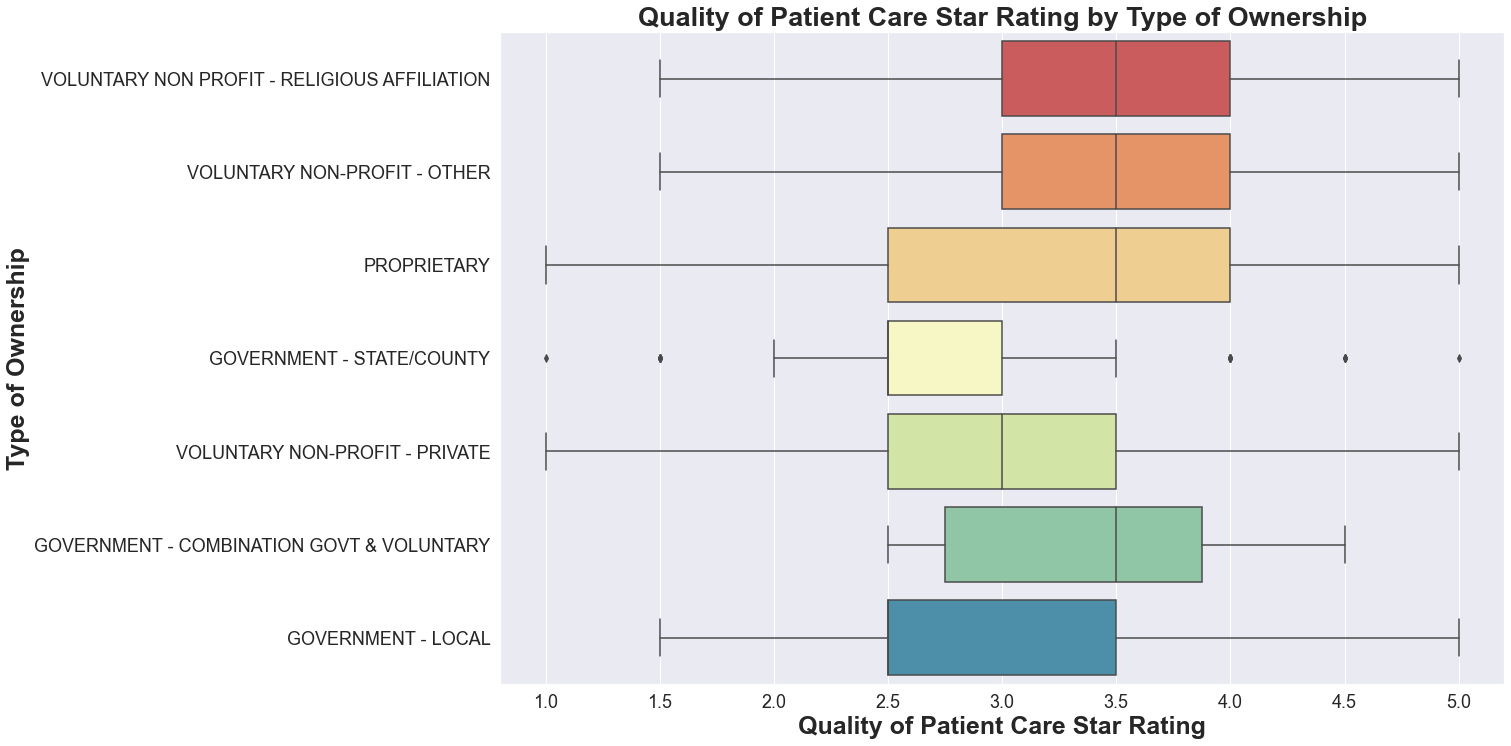

In [34]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=star_rating_only_too_clean_df, x='Quality of patient care star rating', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating by Type of Ownership', size = 27, fontweight = 'bold')


In [35]:
# Create a Type of Ownership DataFrame for each type

gov_combo_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - COMBINATION GOVT & VOLUNTARY']

gov_loc_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - LOCAL']

gov_state_county_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - STATE/COUNTY']

prop_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'PROPRIETARY']

vol_non_prof_rel_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION']

vol_non_prof_other_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - OTHER']

vol_non_prof_priv_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - PRIVATE']


In [36]:
gov_combo_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
63,GOVERNMENT - COMBINATION GOVT & VOLUNTARY,2.5,77.7,64.2,57.3,80.4,86.0,77.3,7.0
1669,GOVERNMENT - COMBINATION GOVT & VOLUNTARY,2.5,84.2,74.3,81.2,69.7,87.8,67.6,9.4
3375,GOVERNMENT - COMBINATION GOVT & VOLUNTARY,4.5,99.8,91.6,91.4,93.4,85.6,94.1,13.4
4105,GOVERNMENT - COMBINATION GOVT & VOLUNTARY,2.5,100.0,67.6,59.1,63.5,49.7,57.5,12.4
4382,GOVERNMENT - COMBINATION GOVT & VOLUNTARY,4.0,99.7,83.9,90.0,90.1,85.8,82.0,16.7


In [37]:
gov_combo_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,3.400000,95.390000,80.040000,80.61000,82.900000,79.820000,76.610000,11.310000
std,0.699206,7.844949,8.992738,12.18619,9.662873,11.530231,9.590557,3.235034
min,2.500000,77.700000,64.200000,57.30000,63.500000,49.700000,57.500000,5.800000
25%,2.750000,96.775000,75.250000,81.80000,80.925000,77.275000,74.375000,9.825000
50%,3.500000,99.300000,83.100000,84.80000,84.700000,84.100000,77.350000,11.750000
75%,3.875000,99.775000,84.425000,87.07500,89.475000,85.950000,81.125000,13.200000
max,4.500000,100.000000,91.600000,91.40000,93.400000,88.100000,94.100000,16.700000


In [38]:
gov_combo_star_rating = pd.DataFrame(gov_combo_df['Quality of patient care star rating'].value_counts())
gov_combo_star_rating


,Quality of patient care star rating
3.5,4
2.5,3
4.0,2
4.5,1


Text(0.5, 1.0, 'Government Combination Quality Star Rating Distribution')

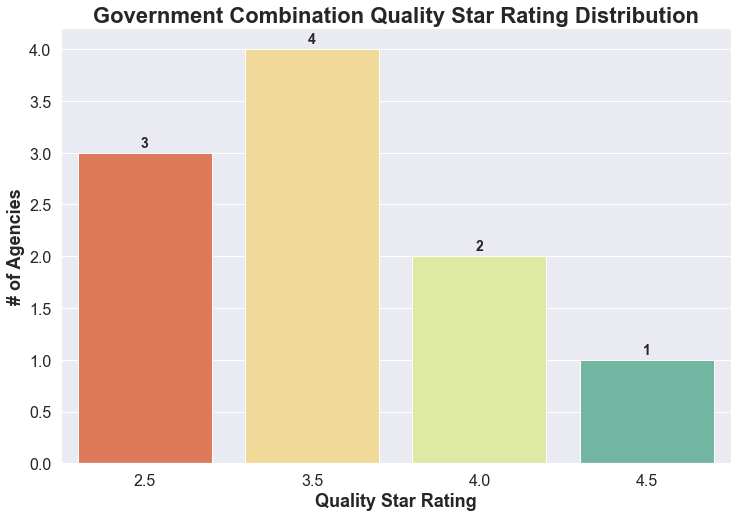

In [79]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_combo_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Combination Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [40]:
gov_loc_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
124,GOVERNMENT - LOCAL,2.0,91.1,72.3,72.7,71.1,69.0,63.2,11.6
147,GOVERNMENT - LOCAL,1.5,94.4,62.2,75.5,65.8,41.1,57.8,23.7
162,GOVERNMENT - LOCAL,2.0,93.2,73.1,92.0,71.3,71.9,64.6,20.1
524,GOVERNMENT - LOCAL,2.5,93.7,74.6,76.6,82.0,85.7,77.4,17.0
532,GOVERNMENT - LOCAL,2.0,86.4,58.8,71.6,58.6,65.9,64.4,9.5


In [41]:
gov_loc_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2.864706,95.203529,74.880000,80.068235,78.394118,76.137647,70.941176,14.800000
std,0.721227,6.587984,9.693331,10.580319,9.682377,13.627301,10.976623,4.496877
min,1.500000,60.100000,34.700000,42.000000,34.200000,37.800000,39.200000,2.000000
25%,2.500000,92.600000,69.900000,75.000000,72.700000,69.000000,64.200000,12.300000
50%,2.500000,98.200000,76.700000,82.100000,79.500000,79.200000,71.600000,15.100000
75%,3.500000,99.600000,81.900000,87.400000,84.500000,85.700000,78.300000,17.600000
max,5.000000,100.000000,93.400000,96.100000,98.600000,98.900000,92.400000,31.900000


In [42]:
gov_loc_star_rating = pd.DataFrame(gov_loc_df['Quality of patient care star rating'].value_counts())
gov_loc_star_rating


,Quality of patient care star rating
2.5,29
3.5,19
3.0,13
2.0,11
4.0,7
1.5,4
4.5,1
5.0,1


Text(0.5, 1.0, 'Government Local Quality Star Rating Distribution')

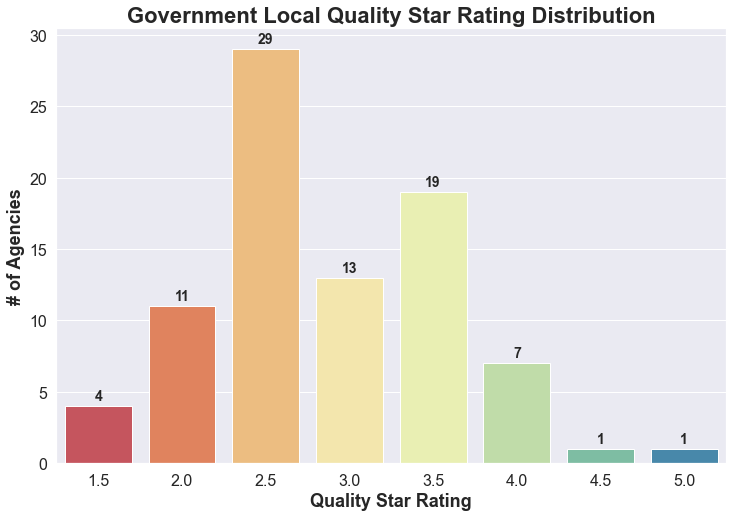

In [80]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_loc_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Local Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [44]:
gov_state_county_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
4,GOVERNMENT - STATE/COUNTY,2.0,89.9,67.5,79.4,70.8,72.1,59.8,20.9
5,GOVERNMENT - STATE/COUNTY,1.5,96.5,66.8,68.6,67.9,48.2,58.4,17.9
15,GOVERNMENT - STATE/COUNTY,4.0,93.7,89.8,88.9,89.9,85.5,83.5,14.4
55,GOVERNMENT - STATE/COUNTY,3.0,97.4,78.5,75.1,81.0,82.8,81.8,16.1
64,GOVERNMENT - STATE/COUNTY,3.0,99.2,79.4,88.7,83.8,74.7,83.2,18.0


In [45]:
gov_state_county_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2.758621,93.467586,74.952414,79.355172,77.731034,74.664138,68.208966,14.504828
std,0.738578,8.938803,9.292829,9.736101,8.019607,13.037194,12.039581,4.309749
min,1.000000,40.400000,43.500000,43.800000,47.500000,35.900000,33.700000,1.800000
25%,2.500000,91.200000,69.000000,74.200000,73.500000,68.900000,61.500000,11.300000
50%,2.500000,96.800000,75.100000,80.500000,78.300000,76.200000,67.800000,14.400000
75%,3.000000,98.900000,80.500000,84.300000,81.700000,82.900000,76.900000,17.500000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,96.500000,26.100000


In [46]:
gov_state_county_star_rating = pd.DataFrame(gov_state_county_df['Quality of patient care star rating'].value_counts())
gov_state_county_star_rating


,Quality of patient care star rating
2.5,41
3.0,36
2.0,27
3.5,18
1.5,8
4.0,8
4.5,5
5.0,1
1.0,1


Text(0.5, 1.0, 'Government State/County Quality Star Rating Distribution')

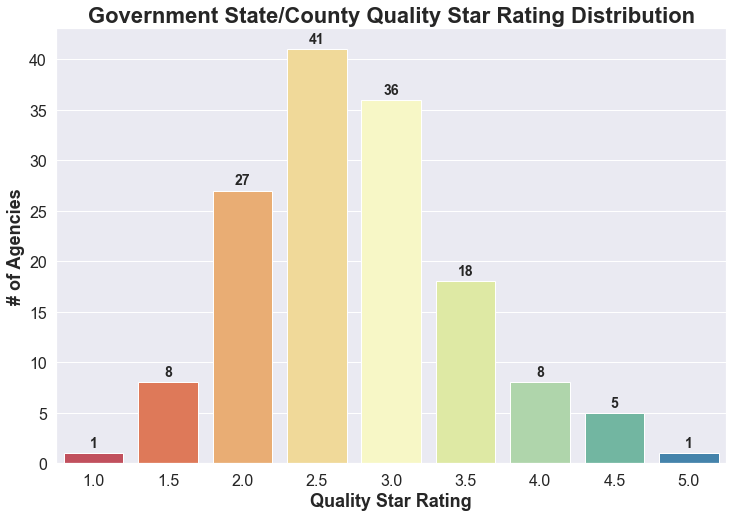

In [81]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_state_county_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government State/County Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [48]:
prop_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
3,PROPRIETARY,4.0,97.9,84.7,87.4,89.2,86.2,88.8,11.9
7,PROPRIETARY,4.5,98.4,91.4,88.8,91.9,87.8,84.1,10.0
8,PROPRIETARY,3.0,86.4,77.4,84.1,86.7,79.6,75.0,17.9
11,PROPRIETARY,2.5,99.2,62.7,72.9,65.3,61.6,59.9,8.3
12,PROPRIETARY,1.5,73.7,57.4,64.9,54.1,43.6,52.9,15.6


In [49]:
prop_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000,5252.000000
mean,3.395088,95.583492,79.363519,80.219916,82.498572,79.570849,76.557064,13.922639
std,1.004768,7.217720,14.376848,14.178251,13.795119,17.328812,16.166751,3.973464
min,1.000000,39.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,94.900000,73.300000,74.700000,77.300000,73.700000,68.200000,11.500000
50%,3.500000,98.400000,82.650000,84.000000,86.100000,85.000000,79.900000,13.800000
75%,4.000000,99.700000,88.800000,89.400000,91.400000,90.800000,87.700000,16.025000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,35.900000


In [50]:
prop_star_rating = pd.DataFrame(prop_df['Quality of patient care star rating'].value_counts())
prop_star_rating


,Quality of patient care star rating
4.0,909
4.5,861
3.5,851
3.0,746
2.5,642
2.0,507
5.0,398
1.5,314
1.0,24


Text(0.5, 1.0, 'Proprietary Quality Star Rating Distribution')

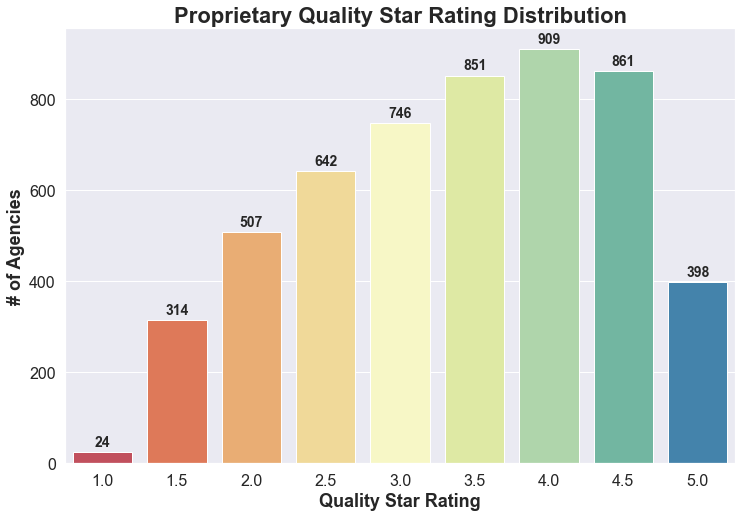

In [82]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = prop_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Proprietary Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [52]:
vol_non_prof_rel_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
0,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,4.5,91.2,89.0,90.8,89.9,96.5,95.4,14.9
1,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,2.0,94.4,55.3,67.5,57.9,50.6,62.5,10.0
6,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,3.5,92.3,81.7,84.8,89.4,82.5,86.2,10.0
26,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,4.5,99.5,86.5,87.6,89.6,87.0,85.4,13.3
133,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,4.0,98.8,87.8,89.9,91.9,92.6,82.2,18.6


In [53]:
vol_non_prof_rel_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,3.416667,94.940000,81.684815,83.690370,83.367778,84.840370,77.503704,14.103704
std,0.784077,8.100091,8.206346,7.568324,8.582772,9.535874,10.850196,3.558955
min,1.500000,53.100000,43.800000,45.300000,45.300000,47.200000,42.000000,0.700000
25%,3.000000,94.425000,78.100000,80.300000,80.400000,80.200000,71.850000,12.150000
50%,3.500000,98.100000,83.000000,84.750000,85.150000,86.050000,78.750000,13.800000
75%,4.000000,99.500000,86.050000,87.900000,88.575000,90.675000,83.750000,15.475000
max,5.000000,100.000000,100.000000,100.000000,99.500000,100.000000,100.000000,29.000000


In [54]:
vol_non_prof_rel_star_rating = pd.DataFrame(vol_non_prof_rel_df['Quality of patient care star rating'].value_counts())
vol_non_prof_rel_star_rating


,Quality of patient care star rating
3.5,70
4.0,56
3.0,56
2.5,28
4.5,26
2.0,18
5.0,11
1.5,5


Text(0.5, 1.0, 'Voluntary Non-Profit Religious Quality Star Rating Distribution')

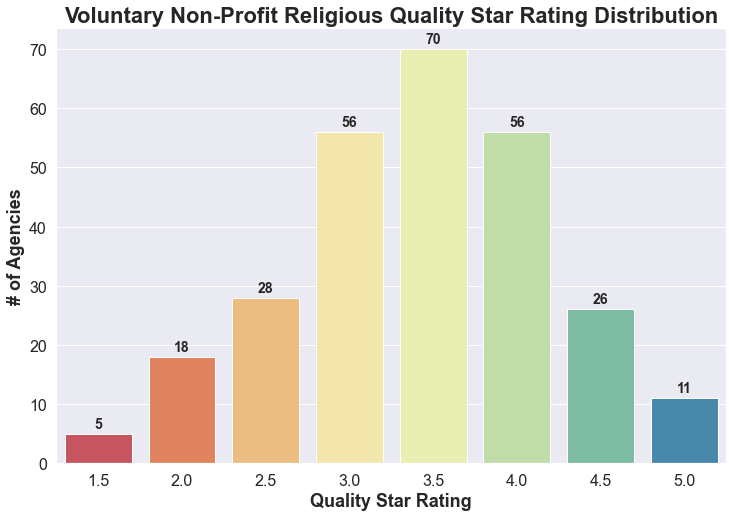

In [83]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_rel_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Religious Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [56]:
vol_non_prof_other_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
2,VOLUNTARY NON-PROFIT - OTHER,2.0,71.9,68.7,70.1,64.4,72.4,58.7,16.4
13,VOLUNTARY NON-PROFIT - OTHER,1.5,96.9,36.1,51.1,41.6,56.4,50.2,16.7
76,VOLUNTARY NON-PROFIT - OTHER,1.5,86.1,66.8,67.5,76.0,40.2,66.7,16.1
83,VOLUNTARY NON-PROFIT - OTHER,3.0,97.7,81.1,82.9,79.6,71.3,73.7,7.2
87,VOLUNTARY NON-PROFIT - OTHER,5.0,99.6,90.2,89.2,93.8,89.3,87.9,5.2


In [57]:
vol_non_prof_other_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,3.290323,94.716590,81.109908,83.594931,83.373963,82.764516,76.897005,14.120507
std,0.745145,7.210065,8.397177,7.367316,7.541919,9.024695,9.448048,3.484405
min,1.500000,56.300000,36.100000,49.900000,41.600000,34.400000,38.000000,0.200000
25%,3.000000,93.700000,77.225000,80.600000,79.225000,79.500000,71.825000,12.200000
50%,3.500000,97.450000,81.500000,84.400000,83.950000,84.000000,77.800000,14.100000
75%,4.000000,99.000000,85.775000,87.500000,87.800000,88.200000,82.500000,15.900000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,35.300000


In [58]:
vol_non_prof_other_star_rating = pd.DataFrame(vol_non_prof_other_df['Quality of patient care star rating'].value_counts())
vol_non_prof_other_star_rating


,Quality of patient care star rating
3.0,112
3.5,107
4.0,74
2.5,63
4.5,33
2.0,26
5.0,10
1.5,9


Text(0.5, 1.0, 'Voluntary Non-Profit Other Quality Star Rating Distribution')

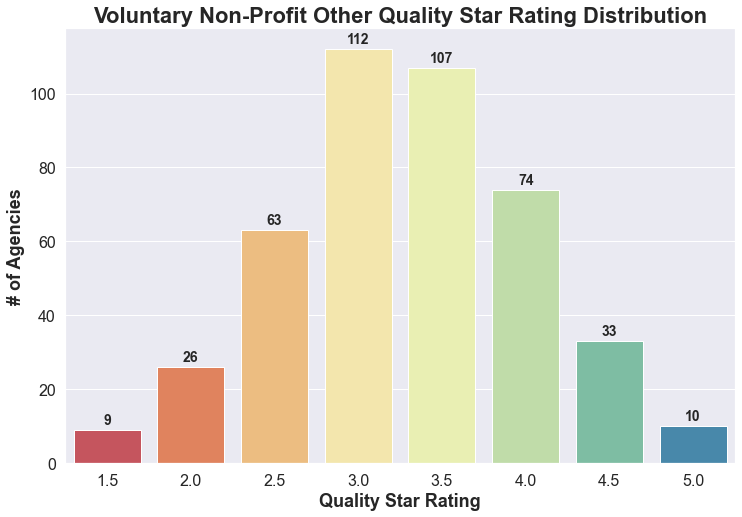

In [84]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_other_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Other Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [60]:
vol_non_prof_priv_df.head()


,Type of Ownership,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
10,VOLUNTARY NON-PROFIT - PRIVATE,2.0,69.4,76.3,85.7,77.0,59.3,51.5,13.1
31,VOLUNTARY NON-PROFIT - PRIVATE,2.0,91.2,73.6,71.3,76.9,77.1,65.4,20.1
47,VOLUNTARY NON-PROFIT - PRIVATE,3.5,98.8,85.0,78.8,87.2,89.0,74.4,13.1
53,VOLUNTARY NON-PROFIT - PRIVATE,4.0,99.0,84.6,87.5,89.1,83.0,81.3,14.4
67,VOLUNTARY NON-PROFIT - PRIVATE,3.0,96.8,79.2,78.4,83.6,72.5,63.6,9.4


In [61]:
vol_non_prof_priv_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,3.140267,94.421947,79.301908,82.071756,81.294466,81.233779,74.418511,14.209542
std,0.771679,8.686978,8.653548,8.337428,8.615184,10.199296,10.543423,3.587964
min,1.000000,31.600000,44.500000,49.700000,46.700000,27.000000,36.400000,0.000000
25%,2.500000,93.600000,75.500000,78.575000,77.100000,76.900000,69.375000,12.300000
50%,3.000000,97.600000,80.700000,83.700000,82.350000,83.500000,75.700000,14.100000
75%,3.500000,99.300000,84.600000,86.925000,86.625000,88.225000,80.900000,16.100000
max,5.000000,100.000000,99.600000,100.000000,100.000000,100.000000,100.000000,29.900000


In [62]:
vol_non_prof_priv_star_rating = pd.DataFrame(vol_non_prof_priv_df['Quality of patient care star rating'].value_counts())
vol_non_prof_priv_star_rating


,Quality of patient care star rating
3.0,140
3.5,107
2.5,95
4.0,83
2.0,43
4.5,27
1.5,18
5.0,9
1.0,2


Text(0.5, 1.0, 'Voluntary Non-Profit Private Quality Star Rating Distribution')

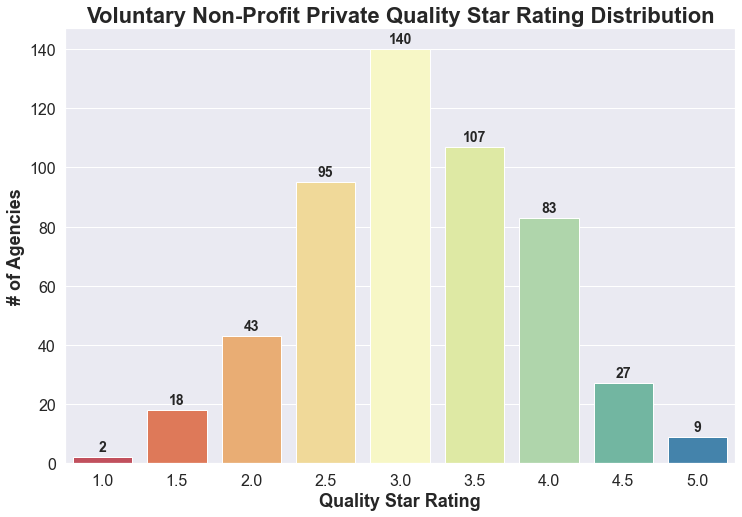

In [85]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_priv_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Private Quality Star Rating Distribution', size = 22, fontweight = 'bold')


## Publically Reported Measures *NOT* Included in the Star Rating Measure

### These measures include the following:
* How often the home health team taught patients (or their family caregivers) about their drugs
* How often the home health team determined whether patients received a flu shot for the current flu season
* How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted
* Changes in skin integrity post-acute care: pressure ulcer/injury
* How often physician-recommended actions to address medication issues were completely timely
* Percent of Residents Experiencing One or More Falls with Major Injury
* Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function
* Discharge to Community (DTC) Risk-Standardized Rate
* Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate
* How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally


### Medicare Spending


In [64]:
# Create the medicare_spend_state_df DataFrame.
medicare_spend_state_df = df[['State',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_state_df.head()


,State,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
0,AK,0.89
1,AK,0.85
2,AK,0.74
3,AK,0.97
4,AK,1.09


In [65]:
medicare_spend_state_df.describe()


,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
count,8393.000000
mean,0.972535
std,0.138200
min,0.320000
25%,0.890000
50%,0.980000
75%,1.050000
max,2.420000


In [66]:
medicare_spend_state_clean_df = medicare_spend_state_df.dropna()
medicare_spend_state_clean_df.describe()

,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
count,8393.000000
mean,0.972535
std,0.138200
min,0.320000
25%,0.890000
50%,0.980000
75%,1.050000
max,2.420000


In [67]:
# Create a medicare_spend_too_df summary using .groupby

medicare_spend_state_clean_df.groupby(['State']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index()


State  \
           
0     AK   
1     AL   
2     AR   
3     AZ   
4     CA   
5     CO   
6     CT   
7     DC   
8     DE   
9     FL   
10    GA   
11    GU   
12    HI   
13    IA   
14    ID   
15    IL   
16    IN   
17    KS   
18    KY   
19    LA   
20    MA   
21    MD   
22    ME   
23    MI   
24    MN   
25    MO   
26    MP   
27    MS   
28    MT   
29    NC   
30    ND   
31    NE   
32    NH   
33    NJ   
34    NM   
35    NV   
36    NY   
37    OH   
38    OK   
39    OR   
40    PA   
41    PR   
42    RI   
43    SC   
44    SD   
45    TN   
46    TX   
47    UT   
48    VA   
49    VI   
50    VT   
51    WA   
52    WI   
53    WV   
54    WY   

   How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally  \
                                                                                                                         count   
0                                                  14                                                                            
1                                                 114                                                                            
2                                                  93                                                                            
3                                                 122                                                                            
4                                                1416                                                                            
5                                                 108                                                                            
6                                                  67                                                                            
7                                                   9                                                                            
8                                                  13                                                                            
9                                                 744                                                                            
10                                                100                                                                            
11                                                  3                                                                            
12                                                 12                                                                            
13                                                106                                                                            
14                                                 47                                                                            
15                                                497                                                                            
16                                                148                                                                            
17                                                 96                                                                            
18                                                 90                                                                            
19                                                171                                                                            
20                                                129                                                                            
21                                                 50                                                                            
22                                                 18                                                                            
23                                                354               

Text(0.5, 1.0, 'How Much Medicare Spends on an Episode of Care by State/Territory')

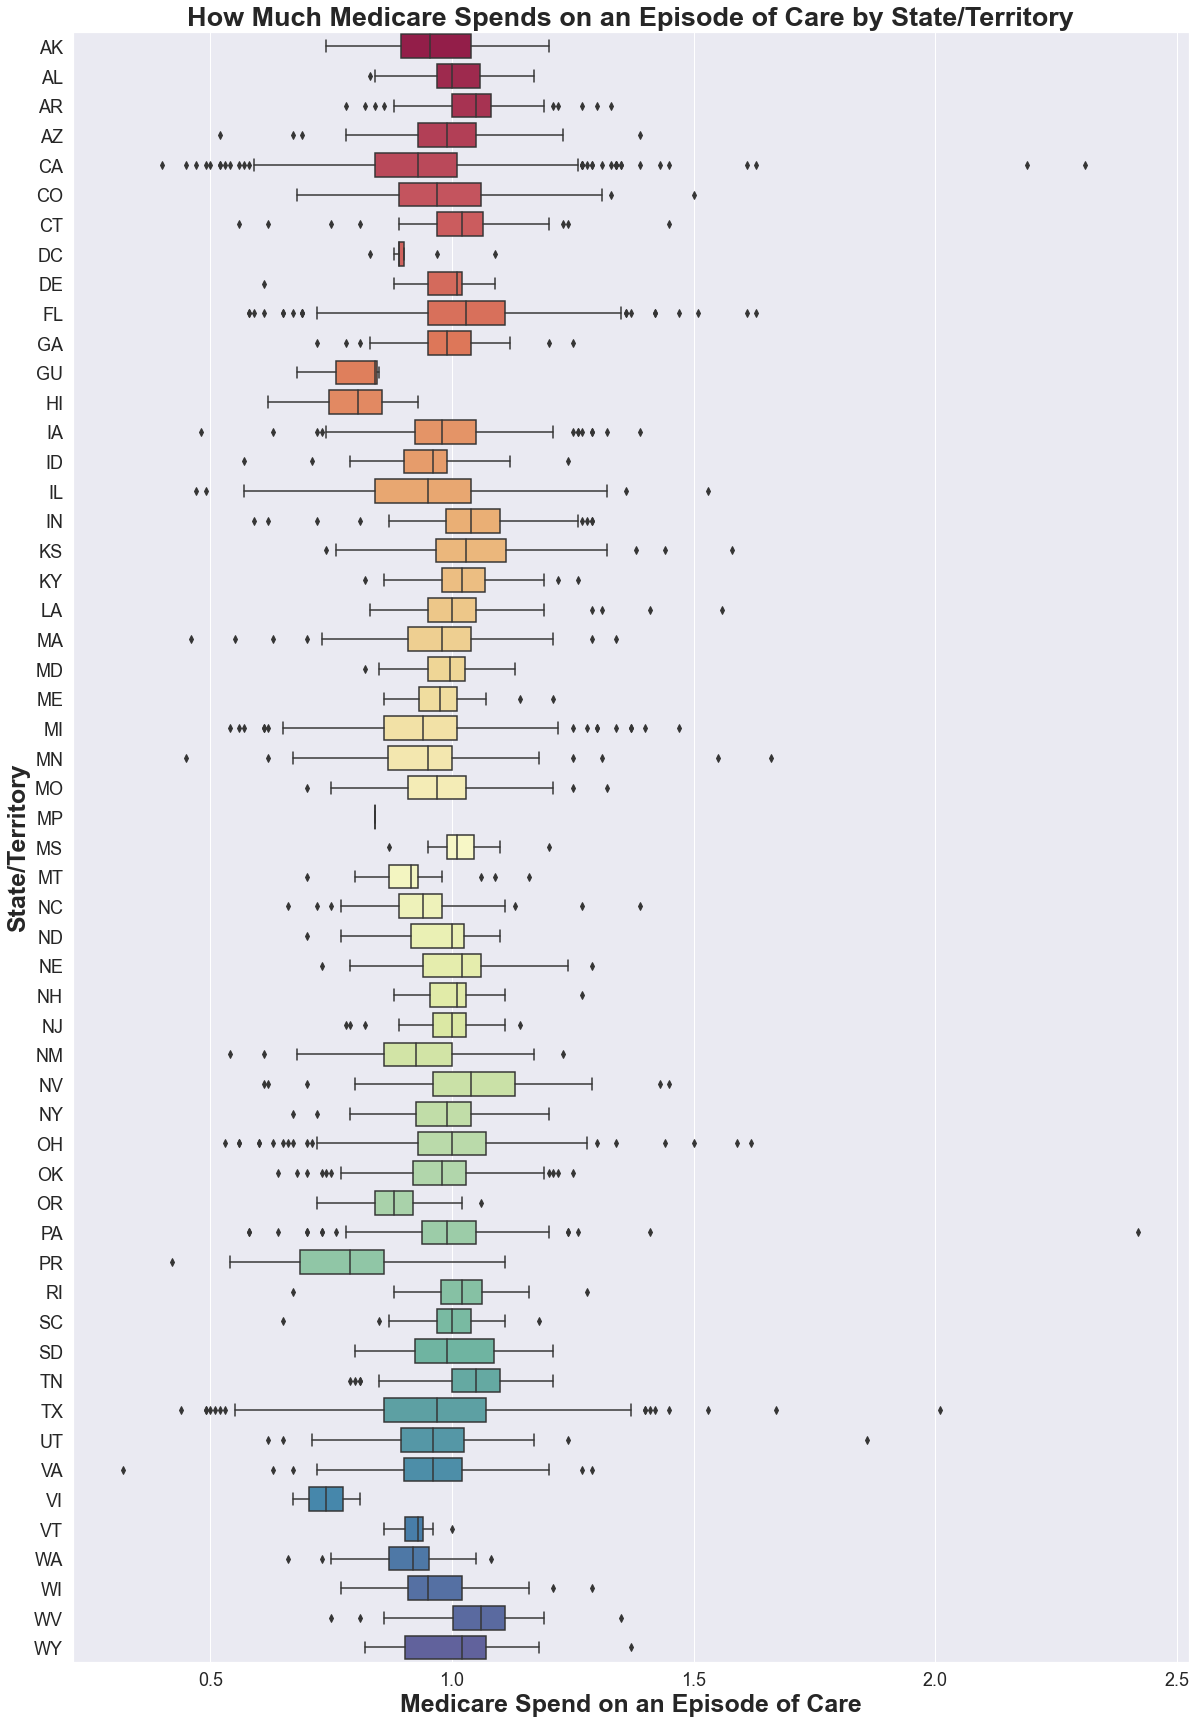

In [68]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=medicare_spend_state_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care by State/Territory', size = 27, fontweight = 'bold')


In [69]:
# Create the medicare_spend_too_df DataFrame.
medicare_spend_too_df = df[['Type of Ownership',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_too_df.head()


,Type of Ownership,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
0,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,0.89
1,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,0.85
2,VOLUNTARY NON-PROFIT - OTHER,0.74
3,PROPRIETARY,0.97
4,GOVERNMENT - STATE/COUNTY,1.09


In [70]:
medicare_spend_too_df.describe()


,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
count,8393.000000
mean,0.972535
std,0.138200
min,0.320000
25%,0.890000
50%,0.980000
75%,1.050000
max,2.420000


In [71]:
medicare_spend_too_clean_df = medicare_spend_too_df.dropna()
medicare_spend_too_clean_df.describe()

,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally"
count,8393.000000
mean,0.972535
std,0.138200
min,0.320000
25%,0.890000
50%,0.980000
75%,1.050000
max,2.420000


In [72]:
# Create a medicare_spend_too_df summary using .groupby

medicare_spend_too_clean_df.groupby(['Type of Ownership']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index()


Type of Ownership  \
                                                  
0     GOVERNMENT - COMBINATION GOVT & VOLUNTARY   
1                            GOVERNMENT - LOCAL   
2                     GOVERNMENT - STATE/COUNTY   
3                                   PROPRIETARY   
4  VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION   
5                  VOLUNTARY NON-PROFIT - OTHER   
6                VOLUNTARY NON-PROFIT - PRIVATE   

  How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally  \
                                                                                                                        count   
0                                                 11                                                                            
1                                                 96                                                                            
2                                                172                                                                            
3                                               6801                                                                            
4                                                280                                                                            
5                                                460                                                                            
6                                                573                                                                            

                                
       mean median   min   max  
0  1.034545   0.97  0.88  1.43  
1  0.984167   0.97  0.65  1.66  
2  0.997616   0.99  0.67  1.58  
3  0.973238   0.98  0.32  2.42  
4  0.968429   0.97  0.65  1.32  
5  0.969326   0.97  0.45  1.39  
6  0.958115   0.96  0.40  1.33

Text(0.5, 1.0, 'How Much Medicare Spends on an Episode of Care')

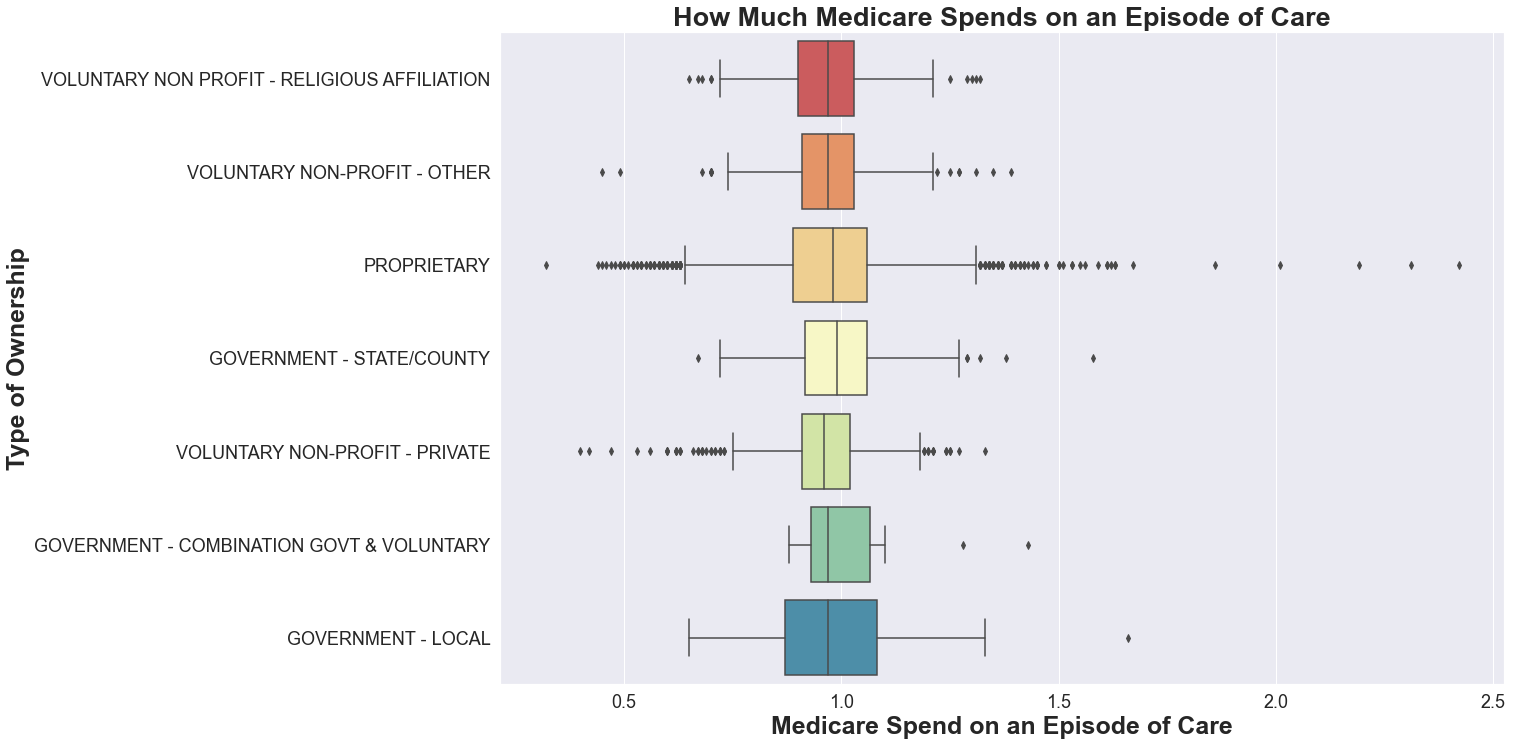

In [73]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=medicare_spend_too_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care', size = 27, fontweight = 'bold')


## Patient Survey Star Rating Analysis


In [74]:
df = pd.read_csv('Resources/HHCAHPS_Provider_Jan2023.csv')


In [75]:
# Set the below parameters so that all rows and columns would be visible

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [76]:
# Calculate the number of rows and columns in the dataset

df.shape


(11610, 26)

In [77]:
df.head()


,CMS Certification Number (CCN),HHCAHPS Survey Summary Star Rating,HHCAHPS Survey Summary Star Rating Footnote,Star Rating for health team gave care in a professional way,Footnote for Star Rating for gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Footnote for Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Footnote for Star Rating for communicated well with them,Percent of patients who reported that their home health team communicated well with them,Footnote for Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Footnote Star Rating discussed medicines, pain, home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them","Footnote for Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0(lowest) to 10(highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate,Footnote Number
0,17000,4,NaN,4,NaN,91,NaN,4,NaN,89,NaN,4,NaN,88,NaN,4,NaN,92,NaN,85,NaN,683,NaN,22,NaN,NaN
1,17009,4,NaN,5,NaN,92,NaN,4,NaN,92,NaN,4,NaN,86,NaN,4,NaN,92,NaN,87,NaN,275,NaN,31,NaN,NaN
2,17013,5,NaN,5,NaN,92,NaN,4,NaN,90,NaN,5,NaN,89,NaN,4,NaN,92,NaN,88,NaN,234,NaN,36,NaN,NaN
3,17014,4,NaN,5,NaN,92,NaN,3,NaN,87,NaN,4,NaN,88,NaN,4,NaN,93,NaN,85,NaN,120,NaN,30,NaN,NaN
4,17016,5,NaN,5,NaN,91,NaN,4,NaN,90,NaN,5,NaN,90,NaN,5,NaN,92,NaN,88,NaN,212,NaN,28,NaN,NaN


In [78]:
df.tail()


,CMS Certification Number (CCN),HHCAHPS Survey Summary Star Rating,HHCAHPS Survey Summary Star Rating Footnote,Star Rating for health team gave care in a professional way,Footnote for Star Rating for gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Footnote for Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Footnote for Star Rating for communicated well with them,Percent of patients who reported that their home health team communicated well with them,Footnote for Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Footnote Star Rating discussed medicines, pain, home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them","Footnote for Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0(lowest) to 10(highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate,Footnote Number
11605,753116,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
11606,753117,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
11607,753118,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
11608,753119,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
11609,753120,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
